In [1]:
import pandas as pd
import re
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df_main_data = pd.read_csv('data.csv')
df_abusive = pd.read_csv('abusive.csv')
df_kamusalay = pd.read_csv('new_kamusalay.csv', encoding='latin-1', header=None)
df_kamusalay.columns=["tidak baku","baku"]

In [3]:
df_main_data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df_main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [5]:
df_main_data.shape

(13169, 13)

In [6]:
df_abusive

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


In [7]:
df_kamusalay

,tidak baku,baku
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [8]:
def text_processing_file():
    global post_df
    
    file = request.files.get('file')

In [9]:
post_df = pd.read_csv('data.csv', encoding='latin-1')

In [10]:
post_df = post_df[['Tweet']]

In [11]:
post_df.drop_duplicates(inplace=True)

In [12]:
post_df['no_char'] = post_df['Tweet'].apply(len)

In [13]:
 post_df['no_words'] = post_df['Tweet'].apply(lambda x: len(x.split()))

In [14]:
post_df

,Tweet,no_char,no_words
0,- disaat semua cowok berusaha melacak perhatia...,138,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14
4,USER USER Kaum cebong kapir udah keliatan dong...,89,14
...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10
13165,USER Kasur mana enak kunyuk',28,5
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9
13167,USER USER USER USER Bom yang real mudah terdet...,135,22


In [15]:
def tweet_cleansing(x):
    tweet = x
    cleaned_tweet = re.sub(r'[^a-zA-Z0-9 ]','',tweet).strip()
    return cleaned_tweet

In [16]:
post_df['cleaned_tweet'] = post_df['Tweet'].apply(lambda x: tweet_cleansing(x))

In [17]:
post_df['no_char_2'] = post_df['cleaned_tweet'].apply(len)

In [18]:
 post_df['no_words_2'] = post_df['cleaned_tweet'].apply(lambda x: len(x.split()))

In [19]:
post_df

,Tweet,no_char,no_words,cleaned_tweet,no_char_2,no_words_2
0,- disaat semua cowok berusaha melacak perhatia...,138,25,disaat semua cowok berusaha melacak perhatian ...,127,21
1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21,RT USER USER siapa yang telat ngasih tau elued...,117,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37,41 Kadang aku berfikir kenapa aku tetap percay...,247,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14,USER USER AKU ITU AKUnnKU TAU MATAMU SIPIT TAP...,72,14
4,USER USER Kaum cebong kapir udah keliatan dong...,89,14,USER USER Kaum cebong kapir udah keliatan dong...,88,14
...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10,USER jangan asal ngomong ndasmu congor lu yg s...,59,10
13165,USER Kasur mana enak kunyuk',28,5,USER Kasur mana enak kunyuk,27,5
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9,USER Hati hati bisu gnnlagi bosan huft xf0x9f...,52,8
13167,USER USER USER USER Bom yang real mudah terdet...,135,22,USER USER USER USER Bom yang real mudah terdet...,134,22


In [20]:
def count_abusive(x):
    cleaned_tweet = x
    matched_list = []
    for i in range(len(df_abusive)):
        for j in x.split():
            word = df_abusive['ABUSIVE'].iloc[i]
            if word==j.lower():
                matched_list.append(word)
                
    return len(matched_list)

In [21]:
post_df['estimated_no_abs_words'] = post_df['cleaned_tweet'].apply(lambda x: count_abusive(x))

In [22]:
conn = sqlite3.connect('database_project.db')

In [23]:
q_create_table = """
    create table if not exists post_df (Tweet varchar(255), no_char int, no_words int, cleaned_tweet varchar(255), no_char_2 int, no_words_2 int);
    """
conn.execute(q_create_table)
conn.commit()

In [24]:
cursor = conn.execute("select count(*) from post_df")
num_rows = cursor.fetchall()
num_rows = num_rows[0][0]
    
if num_rows == 0:
    for i in range(len(post_df)):
        tweet = post_df['Tweet'].iloc[i]
        no_char = int(post_df['no_char'].iloc[i])
        no_words = int(post_df['no_words'].iloc[i])
        cleaned_tweet = post_df['cleaned_tweet'].iloc[i]
        no_char_2 = int(post_df['no_char_2'].iloc[i])
        no_words_2 = int(post_df['no_words_2'].iloc[i])
    
        q_insertion = "insert into post_df (Tweet, no_char, no_words, cleaned_tweet, no_char_2, no_words_2) values (?,?,?,?,?,?)"
        conn.execute(q_insertion,(tweet,no_char,no_words,cleaned_tweet,no_char_2,no_words_2))
        conn.commit()
            
    conn.close()

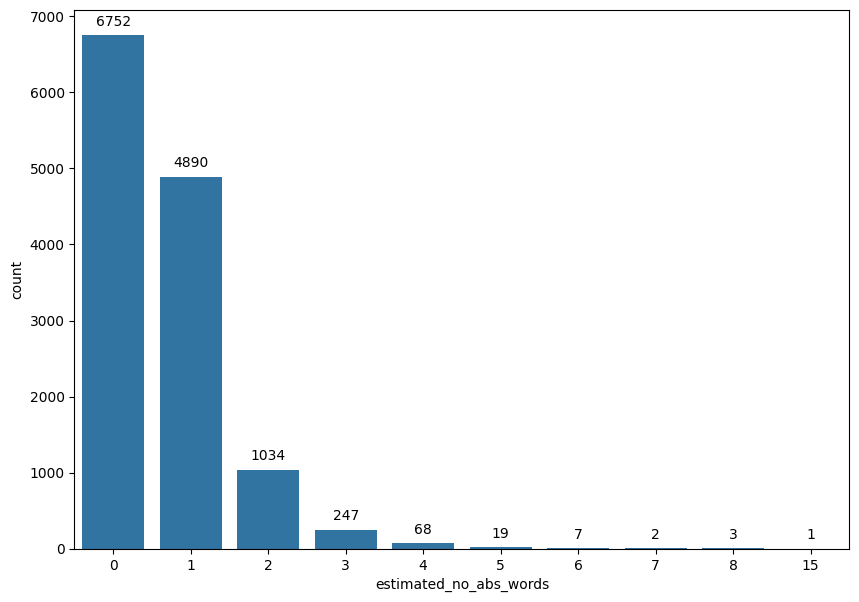

In [26]:
plt.figure(figsize=(10,7))
countplot = sns.countplot(data=post_df, x="estimated_no_abs_words")
for p in countplot.patches:
    countplot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center'
                            , va = 'center', xytext = (0, 10), textcoords = 'offset points')

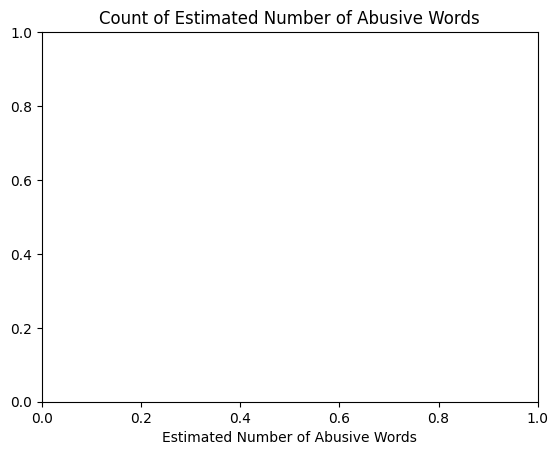

In [27]:
plt.title('Count of Estimated Number of Abusive Words')
plt.xlabel('Estimated Number of Abusive Words')
plt.savefig('new_countplot.jpeg')

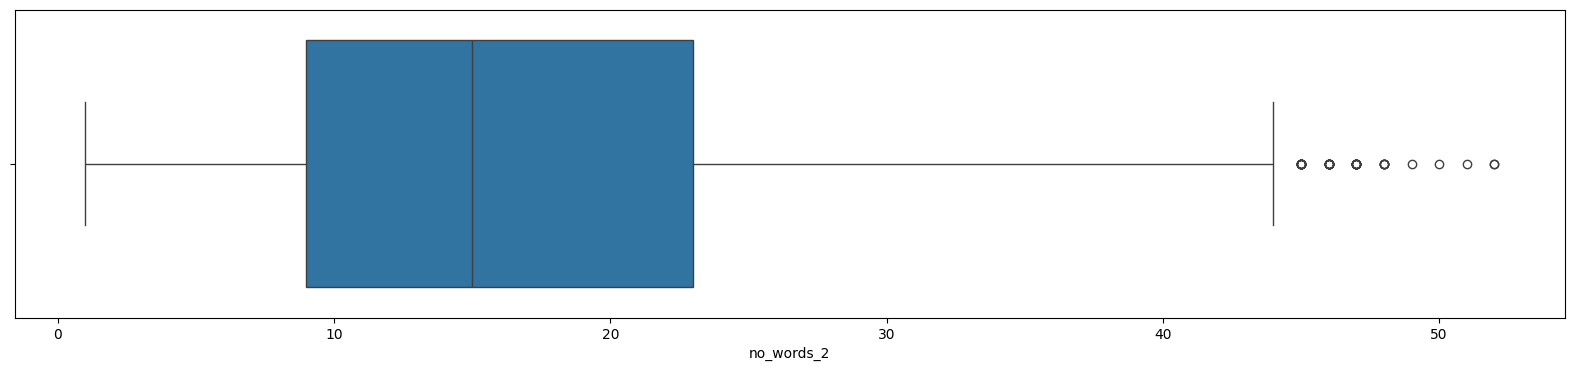

In [28]:
plt.figure(figsize=(20,4))
boxplot = sns.boxplot(data=post_df, x="no_words_2")

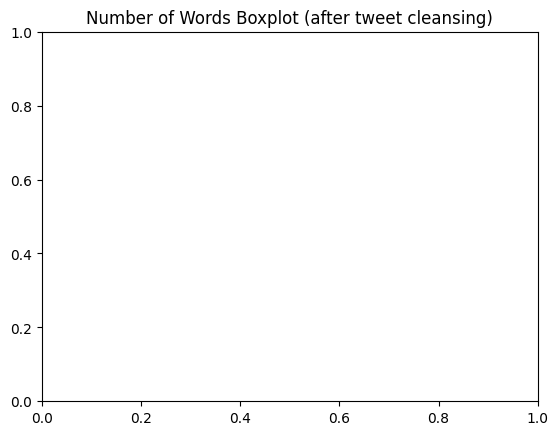

In [29]:
plt.title('Number of Words Boxplot (after tweet cleansing)')
plt.xlabel('')
plt.savefig('new_boxplot.jpeg')

In [ ]:
from flask import Flask, jsonify, request
from flasgger import Swagger, LazyString, LazyJSONEncoder
from flasgger import swag_from

app = Flask(__name__)
app.json_encoder = LazyJSONEncoder
swagger_template = dict(
info = {
    'title': LazyString(lambda: 'API Documentation for Data Processing and Modeling'),
    'version': LazyString(lambda: '1.0.0'),
    'description': LazyString(lambda: 'Dokumentasi API untuk Data Processing dan Modeling'),
    },
    host = LazyString(lambda: request.host)
)
swagger_config = {
    "headers": [],
    "specs": [
        {
            "endpoint": 'docs',
            "route": '/docs.json',
        }
    ],
    "static_url_path": "/flasgger_static",
    "swagger_ui": True,
    "specs_route": "/docs/"
}
swagger = Swagger(app, template=swagger_template,             
                  config=swagger_config)

# define endpoint for "input teks via form"
@swag_from("C:/Users/Lenovo/Challenge-Gold-Level/docs/hello_world.yml", methods=['GET'])
@app.route('/', methods=['GET'])
def text():
    json_response = {
        'status_code': 200,
        'description': "Menyapa Hello World",
        'data': "Hello World",
    }
    response_data = jsonify(json_response)
    return response_data

@swag_from("C:/Users/Lenovo/Challenge-Gold-Level/docs/text_processing.yml", methods=['POST'])
@app.route('/text-processing', methods=['POST'])
def text_processing():
    
    text = request.form.get('text')
    
    json_response = {
        'status_code': 200,
        'description': "Teks yang sudah diproses",
        'data': re.sub(r'[^a-zA-Z0-9]',' ', text)
    }
    
    response_data = jsonify(json_response)
    return response_data

@swag_from("C:/Users/Lenovo/Challenge-Gold-Level/docs/text_processing_file.yml", methods=['POST'])
@app.route('/text-processing-file', methods=['POST'])
def text_processing_file():
    global post_df
    
    file = request.files.get('data.csv')
    
    post_df = pd.read_csv('data.csv', encoding='latin-1', nrows=50)
    post_df = post_df[['Tweet']]
    post_df.drop_duplicates(inplace=True)
    post_df['no_char'] = post_df['Tweet'].apply(len)
    post_df['no_words'] = post_df['Tweet'].apply(lambda x: len(x.split()))
    
    def tweet_cleansing(x):
        tweet = x
        cleaned_tweet = re.sub(r'[^a-zA-Z0-9 ]','',tweet).strip()
        return cleaned_tweet
    
    post_df['cleaned_tweet'] = post_df['Tweet'].apply(lambda x: tweet_cleansing(x))
    post_df['no_char_2'] = post_df['cleaned_tweet'].apply(len)
    post_df['no_words_2'] = post_df['cleaned_tweet'].apply(lambda x: len(x.split()))
    
    def count_abusive(x):
        cleaned_tweet = x
        matched_list = []
        for i in range(len(df_abusive)):
            for j in x.split():
                word = df_abusive['ABUSIVE'].iloc[i]
                if word==j.lower():
                    matched_list.append(word)
        return len(matched_list)
    
    post_df['estimated_no_abs_words'] = post_df['cleaned_tweet'].apply(lambda x: count_abusive(x))
    
    conn = sqlite3.connect('database_project.db')
    q_create_table = """
    create table if not exists post_df (Tweet varchar(255), no_char int, no_words int, cleaned_tweet varchar(255), no_char_2 int, no_words_2 int);
    """
    conn.execute(q_create_table)
    conn.commit()
    
    cursor = conn.execute("select count(*) from post_df")
    num_rows = cursor.fetchall()
    num_rows = num_rows[0][0]
    
    if num_rows == 0:
        for i in range(len(post_df)):
            tweet = post_df['Tweet'].iloc[i]
            no_char = int(post_df['no_char'].iloc[i])
            no_words = int(post_df['no_words'].iloc[i])
            cleaned_tweet = post_df['cleaned_tweet'].iloc[i]
            no_char_2 = int(post_df['no_char_2'].iloc[i])
            no_words_2 = int(post_df['no_words_2'].iloc[i])
    
            q_insertion = "insert into post_df (Tweet, no_char, no_words, cleaned_tweet, no_char_2, no_words_2) values (?,?,?,?,?,?)"
            conn.execute(q_insertion,(tweet,no_char,no_words,cleaned_tweet,no_char_2,no_words_2))
            conn.commit()
            
    conn.close()
    
    plt.figure(figsize=(10,7))
    countplot = sns.countplot(data=post_df, x="estimated_no_abs_words")
    for p in countplot.patches:
        countplot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center'
                            , va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    plt.title('Count of Estimated Number of Abusive Words')
    plt.xlabel('Estimated Number of Abusive Words')
    plt.savefig('new_countplot.jpeg')
    
    plt.figure(figsize=(20,4))
    boxplot = sns.boxplot(data=post_df, x="no_words_2")

    print()
    
    plt.title('Number of Words Boxplot (after tweet cleansing)')
    plt.xlabel('')
    plt.savefig('new_boxplot.jpeg')
    
    json_response = {
        'status_code': 200,
        'description': "Teks yang sudah diproses",
        'data': list(post_df['cleaned_tweet'])
    }
    
    response_data = jsonify(json_response)
    return response_data

if __name__ == "__main__":
    app.run('0.0.0.0')

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.10.26:5000
Press CTRL+C to quit
127.0.0.1 - - [02/Oct/2023 13:42:52] "GET /docs HTTP/1.1" 308 -
127.0.0.1 - - [02/Oct/2023 13:42:52] "GET /docs/ HTTP/1.1" 200 -
127.0.0.1 - - [02/Oct/2023 13:42:52] "GET /flasgger_static/swagger-ui.css HTTP/1.1" 200 -
127.0.0.1 - - [02/Oct/2023 13:42:52] "GET /flasgger_static/lib/jquery.min.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Oct/2023 13:42:52] "GET /flasgger_static/swagger-ui-standalone-preset.js HTTP/1.1" 200 -
127.0.0.1 - - [02/Oct/2023 13:42:52] "GET /flasgger_static/swagger-ui-bundle.js HTTP/1.1" 200 -
ERROR:root:jsonify failure; defaulting to json.dumps
Traceback (most recent call last):
  File "C:\Users\Lenovo\my_env\lib\site-packages\flasgger\base.py", line 164, in get
    return jsonify(self.loader())
  File "C:\Users\Lenovo\my_env\lib\site-packages\flask\json\__init__.py", line 170, in jsonify
    return current_app.json.response(*args, **kw

127.0.0.1 - - [02/Oct/2023 13:43:12] "GET /docs.json HTTP/1.1" 500 -
INFO:werkzeug:127.0.0.1 - - [02/Oct/2023 13:43:12] "GET /docs.json HTTP/1.1" 500 -
